In [1]:
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
import cmocean.cm as cmo
import pickle
import eddytools as et
plt.rcParams['figure.facecolor'] = 'white'
%config InlineBackend.print_figure_kwargs = {'bbox_inches': None}

In [2]:
path = "../data_for_plots/" 

In [3]:
diamet = xr.open_mfdataset(path + "eddy_scale_distribution.nc")
amplit = xr.open_mfdataset(path + "eddy_amp_distribution.nc")
tracks = xr.open_mfdataset(path + "tracks_referenced_to_00.nc")

In [4]:
all_tracks = xr.open_mfdataset(path + "all_tracks_02010101_03001230.nc")

In [5]:
cycl = all_tracks.where(all_tracks.type == 'cyclonic')
anti = all_tracks.where(all_tracks.type == 'anticyclonic')

In [6]:
a_oo_mean_amp = anti.where(all_tracks.SIarea < 0.15).dropna("number").amp.mean().values
c_oo_mean_amp = cycl.where(all_tracks.SIarea < 0.15).dropna("number").amp.mean().values
a_ice_mean_amp = anti.where(all_tracks.SIarea > 0.8).dropna("number").amp.mean().values
c_ice_mean_amp = cycl.where(all_tracks.SIarea > 0.8).dropna("number").amp.mean().values

In [7]:
a_oo_std_amp = anti.where(all_tracks.SIarea < 0.15).dropna("number").amp.std().values
c_oo_std_amp = cycl.where(all_tracks.SIarea < 0.15).dropna("number").amp.std().values
a_ice_std_amp = anti.where(all_tracks.SIarea > 0.8).dropna("number").amp.std().values
c_ice_std_amp = cycl.where(all_tracks.SIarea > 0.8).dropna("number").amp.std().values

In [8]:
a_oo_mean_dia = anti.where(all_tracks.SIarea < 0.15).dropna("number").scale.mean().values * 2
c_oo_mean_dia = cycl.where(all_tracks.SIarea < 0.15).dropna("number").scale.mean().values * 2
a_ice_mean_dia = anti.where(all_tracks.SIarea > 0.8).dropna("number").scale.mean().values * 2
c_ice_mean_dia = cycl.where(all_tracks.SIarea > 0.8).dropna("number").scale.mean().values * 2

In [9]:
a_oo_std_dia = anti.where(all_tracks.SIarea < 0.15).dropna("number").scale.std().values * 2
c_oo_std_dia = cycl.where(all_tracks.SIarea < 0.15).dropna("number").scale.std().values * 2
a_ice_std_dia = anti.where(all_tracks.SIarea > 0.8).dropna("number").scale.std().values * 2
c_ice_std_dia = cycl.where(all_tracks.SIarea > 0.8).dropna("number").scale.std().values * 2

In [10]:
a_oo_mean_lifetime = anti.where(all_tracks.SIarea < 0.15).dropna("number").lifetime.mean().values
c_oo_mean_lifetime = cycl.where(all_tracks.SIarea < 0.15).dropna("number").lifetime.mean().values
a_ice_mean_lifetime = anti.where(all_tracks.SIarea > 0.8).dropna("number").lifetime.mean().values
c_ice_mean_lifetime = cycl.where(all_tracks.SIarea > 0.8).dropna("number").lifetime.mean().values

In [11]:
a_oo_std_lifetime = anti.where(all_tracks.SIarea < 0.15).dropna("number").lifetime.std().values
c_oo_std_lifetime = cycl.where(all_tracks.SIarea < 0.15).dropna("number").lifetime.std().values
a_ice_std_lifetime = anti.where(all_tracks.SIarea > 0.8).dropna("number").lifetime.std().values
c_ice_std_lifetime = cycl.where(all_tracks.SIarea > 0.8).dropna("number").lifetime.std().values

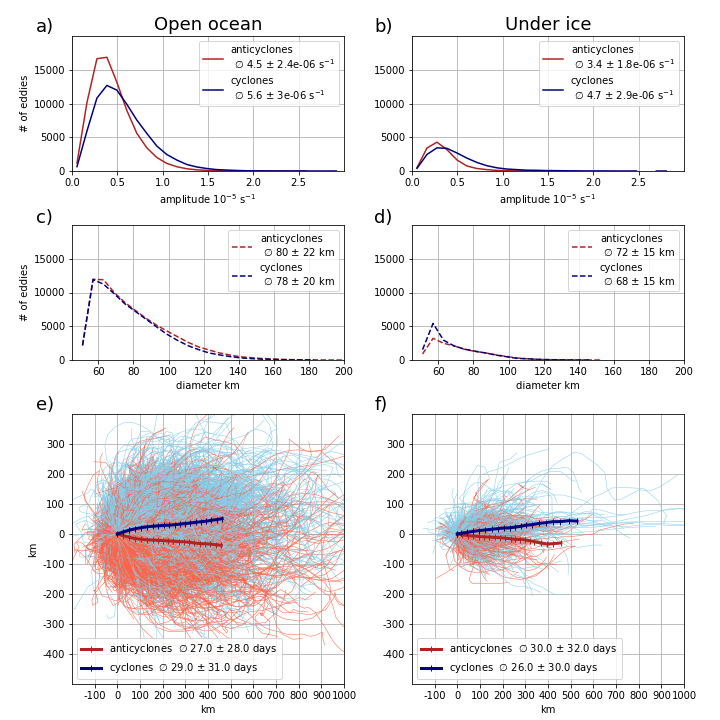

In [12]:
fig, ax = plt.subplots(3, 2, figsize=(10, 10), gridspec_kw={'height_ratios': [3, 3, 6]})
amp_x = amplit.amp.values
dia_x = diamet.scale.values * 2

###################################################################################################

ax[0, 0].set_title("Open ocean", fontsize=18)
ax[0, 0].plot(amp_x, amplit.amp_anti_oo.values, color="firebrick", ls="-",
             label="anticyclones\n"
              + r" $\varnothing$ " + str(np.around(a_oo_mean_amp * 1e6, decimals=1)) 
              + r" $\pm$ " + str(np.around(a_oo_std_amp, decimals=7)) + r" s$^{-1}$")
ax[0, 0].plot(amp_x, amplit.amp_cyc_oo.values, color="navy", ls="-",
             label="cyclones\n"
              + r" $\varnothing$ " + str(np.around(c_oo_mean_amp * 1e6, decimals=1)) 
              + r" $\pm$ " + str(np.around(c_oo_std_amp, decimals=7)) + r" s$^{-1}$")
ax[0, 0].set_ylabel("# of eddies")

###################################################################################################

ax[0, 1].set_title("Under ice", fontsize=18)
ax[0, 1].plot(amp_x, amplit.amp_anti_ice.values, color="firebrick", ls="-",
             label="anticyclones\n"
              + r" $\varnothing$ " + str(np.around(a_ice_mean_amp * 1e6, decimals=1)) 
              + r" $\pm$ " + str(np.around(a_ice_std_amp, decimals=7)) + r" s$^{-1}$")
ax[0, 1].plot(amp_x, amplit.amp_cyc_ice.values, color="navy", ls="-",
             label="cyclones\n"
              + r" $\varnothing$ " + str(np.around(c_ice_mean_amp * 1e6, decimals=1)) 
              + r" $\pm$ " + str(np.around(c_ice_std_amp, decimals=7)) + r" s$^{-1}$")

###################################################################################################

for axes in [ax[0, 0], ax[0, 1]]:
    axes.set_xlim(0, 3e-5)
    axes.set_ylim(0, 2e4)
    axes.grid()
    axes.set_xticks(np.arange(0, 3e-5, 0.5e-5))
    axes.set_xticklabels(np.arange(0, 3, 0.5))
    axes.set_yticks(np.arange(0, 2e4, 5e3))
    axes.set_xlabel("amplitude 10$^{-5}$ s$^{-1}$")
    axes.legend(loc=1)
    
###################################################################################################
###################################################################################################

ax[1, 0].plot(dia_x, diamet.scale_anti_oo.values, color="firebrick", ls="--",
             label="anticyclones\n" 
              + r" $\varnothing$ " + str(int(np.around(a_oo_mean_dia))) + r" $\pm$ " + str(int(np.around(a_oo_std_dia)))  + " km")
ax[1, 0].plot(dia_x, diamet.scale_cyc_oo.values, color="navy", ls="--",
             label="cyclones\n" 
              + r" $\varnothing$ " + str(int(np.around(c_oo_mean_dia))) + r" $\pm$ " + str(int(np.around(c_oo_std_dia)))  + " km")
ax[1, 0].set_ylabel("# of eddies")

###################################################################################################

ax[1, 1].plot(dia_x, diamet.scale_anti_ice.values, color="firebrick", ls="--",
             label="anticyclones\n" 
              + r" $\varnothing$ " + str(int(np.around(a_ice_mean_dia))) + r" $\pm$ " + str(int(np.around(a_ice_std_dia)))  + " km")
ax[1, 1].plot(dia_x, diamet.scale_cyc_ice.values, color="navy", ls="--",
             label="cyclones\n" 
              + r" $\varnothing$ " + str(int(np.around(c_ice_mean_dia))) + r" $\pm$ " + str(int(np.around(c_ice_std_dia)))  + " km")

###################################################################################################

for axes in [ax[1, 0], ax[1, 1]]:
    axes.set_xlim(45, 200)
    axes.set_ylim(0, 2e4)
    axes.grid()
    axes.set_yticks(np.arange(0, 2e4, 5e3))
    axes.set_xlabel("diameter km")
    axes.legend(loc=1)

###################################################################################################
###################################################################################################

for tt in np.arange(0, len(tracks.track), 10):
    ax[2, 0].plot(tracks.a_oo_tralo[tt, :], tracks.a_oo_trala[tt, :], lw=0.5, color='tomato')
    ax[2, 0].plot(tracks.c_oo_tralo[tt, :], tracks.c_oo_trala[tt, :], lw=0.5, color='skyblue')  
            
ax[2, 0].plot(np.nanmean(tracks.a_oo_tralo[:, 0:20], axis=0), np.nanmean(tracks.a_oo_trala[:, 0:20], axis=0), 
         lw=3, color='firebrick', marker='|', label='anticyclones '
              + r' $\varnothing$ '  + str(np.around(a_oo_mean_lifetime)) + r" $\pm$ " + str(np.around(a_oo_std_lifetime)) + ' days')
ax[2, 0].plot(np.nanmean(tracks.c_oo_tralo[:, 0:20], axis=0), np.nanmean(tracks.c_oo_trala[:, 0:20], axis=0), 
         lw=3, color='navy', marker='|', label='cyclones ' 
              + r' $\varnothing$ '  + str(np.around(c_oo_mean_lifetime)) + r" $\pm$ " + str(np.around(c_oo_std_lifetime)) + ' days')

ax[2, 0].set_xlim(-2e5, 10e5)
ax[2, 0].set_ylim(-5e5, 4e5)
ax[2, 0].grid()

ax[2, 0].set_xticks(np.arange(-1e5, 10.1e5, 1e5))
ax[2, 0].set_xticklabels(np.arange(-100, 1001, 100))
ax[2, 0].set_yticks(np.arange(-4e5, 3.1e5, 1e5))
ax[2, 0].set_yticklabels(np.arange(-400, 301, 100))
ax[2, 0].set_xlabel('km')
ax[2, 0].set_ylabel('km')
ax[2, 0].legend(loc=3)

#####################################################################################################

for tt in np.arange(0, len(tracks.track), 10):
    ax[2, 1].plot(tracks.a_ice_tralo[tt, :], tracks.a_ice_trala[tt, :], lw=0.5, color='tomato')
    ax[2, 1].plot(tracks.c_ice_tralo[tt, :], tracks.c_ice_trala[tt, :], lw=0.5, color='skyblue')  
            
ax[2, 1].plot(np.nanmean(tracks.a_ice_tralo[:, 0:20], axis=0), np.nanmean(tracks.a_ice_trala[:, 0:20], axis=0), 
         lw=3, color='firebrick', marker='|', label='anticyclones ' 
              + r' $\varnothing$ '  + str(np.around(a_ice_mean_lifetime)) + r" $\pm$ " + str(np.around(a_ice_std_lifetime)) + ' days')
ax[2, 1].plot(np.nanmean(tracks.c_ice_tralo[:, 0:20], axis=0), np.nanmean(tracks.c_ice_trala[:, 0:20], axis=0), 
         lw=3, color='navy', marker='|', label='cyclones ' 
              + r' $\varnothing$ '  + str(np.around(c_ice_mean_lifetime)) + r" $\pm$ " + str(np.around(c_ice_std_lifetime)) + ' days')

ax[2, 1].set_xlim(-2e5, 10e5)
ax[2, 1].set_ylim(-5e5, 4e5)
ax[2, 1].grid()

ax[2, 1].set_xticks(np.arange(-1e5, 10.1e5, 1e5))
ax[2, 1].set_xticklabels(np.arange(-100, 1001, 100))
ax[2, 1].set_yticks(np.arange(-4e5, 3.1e5, 1e5))
ax[2, 1].set_yticklabels(np.arange(-400, 301, 100))
ax[2, 1].set_xlabel('km')
#ax[2, 1].set_ylabel('km')
ax[2, 1].legend(loc=3)

plt.subplots_adjust(bottom=0.05, top=0.95, left=0.1, right=0.95, hspace=0.3, wspace=0.25)

fig.text(0.05, 0.955, "a)", fontsize=18)
fig.text(0.52, 0.955, "b)", fontsize=18)
fig.text(0.05, 0.69, "c)", fontsize=18)
fig.text(0.52, 0.69, "d)", fontsize=18)
fig.text(0.05, 0.43, "e)", fontsize=18)
fig.text(0.52, 0.43, "f)", fontsize=18)

plt.savefig("fig03-eddy_statistics.png", dpi=300)